**Autor: Jan Jagodziński, nr indeksu: 448262.**


# Zadanie 1



In [551]:
import pandas as pd
import plotly.express as px
import numpy as np
from scipy.stats import norm, uniform, spearmanr, shapiro, chi2_contingency, chi2, nct, mannwhitneyu, pareto
from scipy.stats  import t as tstud
import statsmodels.api as sm
import sklearn.datasets
import matplotlib.pyplot as plt
import seaborn as sb
from importlib import reload
import statsmodels.api as sm



In [552]:
df = pd.read_csv('dane_projekt1.csv', sep=';')

In [553]:
df.describe()

,id,waga,wzrost,plec,dzieci,wiek,dochod,oszczednosci,jednoos,miejsce,wydatki_zyw
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,155.500000,79.814742,172.726774,1.458065,2.003226,56.241935,1519.658000,945.994839,0.429032,2.003226,12.383097
std,89.633513,3.292902,6.906733,0.499044,1.352209,6.746653,1293.464325,787.601212,0.495738,0.739537,3232.382607
min,1.000000,68.890000,155.670000,1.000000,0.000000,37.000000,645.270000,-204.240000,0.000000,1.000000,-55640.190000
25%,78.250000,77.430000,167.090000,1.000000,1.000000,52.000000,966.807500,392.545000,0.000000,1.000000,199.757500
50%,155.500000,79.890000,172.815000,1.000000,2.000000,56.000000,1190.840000,741.190000,0.000000,2.000000,249.265000
75%,232.750000,82.112500,178.032500,2.000000,3.000000,61.000000,1620.460000,1270.222500,1.000000,3.000000,283.267500
max,310.000000,86.730000,190.790000,2.000000,5.000000,77.000000,17412.240000,5485.220000,1.000000,3.000000,301.690000


Mamy 310 obserwacji. Zmiennych jakościowych jest  3: płeć (plec) , status gospodarstwa (jednoos), wielkość miejscowości (miejsce), natomiast danych ilościowych jest 7: waga, wzrost, liczba dzieci (dzieci), wiek, dochód (dochod), oszczędności (oszczednosci), wydatki na żywność (wydatki_zyw), przy czym zmienna dzieci jest dykretna. Nie ma braków w danych, jednak istnieją nieprawidłowości - ujemne wydatki na żywność. W przeciwieństwie do ujemnych oszczędności, nie ma uzasadnionych ujemnych wartości dla tej zmiennej, dlatego odrzucimy nieprawidłowe obserwacje.

Pozbędę się tych nieprawidłowości. Najpierw jednak zmienię w DataFramie indeksowanie, aby indeksem głównym było 'id'.

In [554]:
n = len(pd.unique(df['id']))
print(n)

310


Dokonałem sprawdzenia, każda obserwacja ma inne id. Zatem zmieniam indeksowanie.

In [555]:
df = df.set_index('id')
df = df.sort_values('id')

Usuwam nieprawidłowe obserwacje.

In [556]:
df = df.drop(axis = 0, labels = df[df['wydatki_zyw'] < 0].index)

In [557]:
df.describe()

,waga,wzrost,plec,dzieci,wiek,dochod,oszczednosci,jednoos,miejsce,wydatki_zyw
count,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000
mean,79.819309,172.805757,1.463816,1.990132,56.259868,1389.315724,887.975954,0.417763,2.000000,235.571151
std,3.303614,6.935242,0.499511,1.341112,6.782444,660.781113,668.759849,0.494004,0.740172,57.232769
min,68.890000,155.670000,1.000000,0.000000,37.000000,645.270000,-204.240000,0.000000,1.000000,56.270000
25%,77.415000,167.130000,1.000000,1.000000,51.750000,965.830000,384.657500,0.000000,1.000000,204.207500
50%,79.895000,172.890000,1.000000,2.000000,56.500000,1181.350000,722.325000,0.000000,2.000000,250.465000
75%,82.142500,178.117500,2.000000,3.000000,61.000000,1613.947500,1236.880000,1.000000,3.000000,284.110000
max,86.730000,190.790000,2.000000,5.000000,77.000000,4780.150000,3390.590000,1.000000,3.000000,301.690000


Pozbyliśmy się sześciu obserwacji ('id' od 305 do 310). Pozostałe dane wydają się być prawidłowe.

**PŁEĆ**

W naszej próbie, 53.6% osób to kobiety. Prawdopodobnie w Bajtocji mieszka więcej kobiet niż mężczyzn, co jeszcze sprawdzimy.

In [558]:
plec_dict = {1 : 'kobieta', 2 : 'mężczyzna'}
plec_freq = df.sort_values('plec')['plec'].map(plec_dict).value_counts(sort = False)
print(plec_freq)
print( df.sort_values('plec')['plec'].map(plec_dict).value_counts(normalize = True, sort = False))

plec
kobieta      163
mężczyzna    141
Name: count, dtype: int64
plec
kobieta      0.536184
mężczyzna    0.463816
Name: proportion, dtype: float64


 **WZROST**

Średni wzrost mieszkańca to ok. 172.8 cm. Odchylenie standardowe to ok. 6,94 cm.
Zmienna 'wzrost' ma rozkład normalny o średniej równej średniemu wzrostowi w populacji i odchyleniu standardowemu równemu odchyleniu standardowemu w populacji.

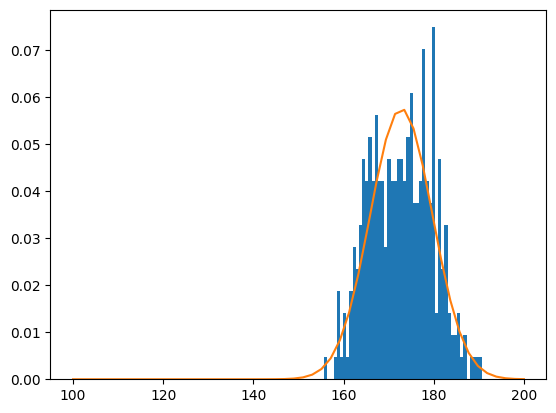

In [559]:
x = np.linspace(100, 200)
y = norm.pdf(x, np.mean(df['wzrost']), np.std(df['wzrost']))
plt.hist(df['wzrost'], bins = 50, density = True)
plt.plot(x,y)
plt.show()

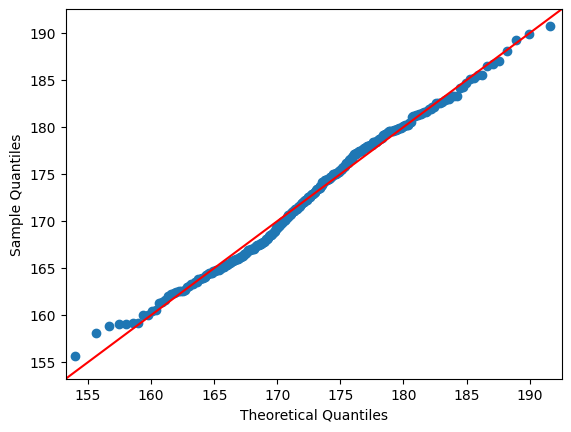

In [560]:
sm.qqplot(df['wzrost'], line = '45', loc = np.mean(df['wzrost']), scale = np.std(df['wzrost']));

In [561]:
sw_test_wzrost = shapiro(df['wzrost'])
print('p-value = ' + str(sw_test_wzrost.pvalue))

p-value = 0.02431187406182289


Również p-value w teście Shapiro-Wilka mówi, że nie możemy odrzucić tezy o normalności rozkładu wzrostu w populacji przy poziomie istotności 0.01.

**DZIECI**

Liczba dzieci jest zmienną dyskretną, przedstawiam ją więc w tabeli częstości. Dominantą jest 1 - ok. 29% osób ma jedno dziecko - natomiast mieszkaniec ma średnio 1.99, czyli niemal dwójkę dzieci, odchylenie standardowe jest stosunkowo duże, bo to zmienna dyskretna o wartościach całkowitych. Od jednego dziecka wzwyż, tendencja występowania w populacji jest spadkowa przy rosnącej liczbie dzieci.

In [562]:
dzieci_freq = df.sort_values('dzieci')['dzieci'].value_counts(sort = False)
print(dzieci_freq)
print(df.sort_values('dzieci')['dzieci'].value_counts(normalize = True, sort = False))

dzieci
0    38
1    89
2    74
3    56
4    35
5    12
Name: count, dtype: int64
dzieci
0    0.125000
1    0.292763
2    0.243421
3    0.184211
4    0.115132
5    0.039474
Name: proportion, dtype: float64


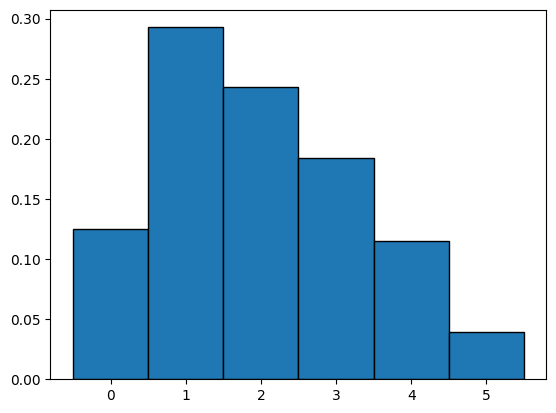

In [563]:
plt.hist(df['dzieci'], np.arange(-0.5, 6), density = True, edgecolor = 'black' )
plt.show()

**RODZAJ MIESZKANIA**

Około 58% mieszkańców żyje w gospodarstwie wieloosobowym, pozostałe ok. 42% w jednoosobowym.

In [564]:
jednoos_freq = df.sort_values('jednoos')['jednoos'].value_counts(sort = False)
print(jednoos_freq)
print(df.sort_values('jednoos')['jednoos'].value_counts(normalize = True, sort = False))

jednoos
0    177
1    127
Name: count, dtype: int64
jednoos
0    0.582237
1    0.417763
Name: proportion, dtype: float64


**MIEJSCE ZAMIESZKANIA**

W populacji przeważają osoby mieszkające w średnich miejscowościach (od 10 000 do 100 000 mieszkańców) - ok 45%. Wśród pozostałych ok 55%, niemal dokładnie jedna połowa mieszka w miejscowościach do 10 000 mieszkańców, a druga w miejscowościach powyżej 100 000 mieszkańców.

In [565]:
miejsce_freq = df.sort_values('miejsce')['miejsce'].value_counts(sort = False)
print(miejsce_freq)
print( df.sort_values('miejsce')['miejsce'].value_counts(normalize = True, sort = False))

miejsce
1     83
2    138
3     83
Name: count, dtype: int64
miejsce
1    0.273026
2    0.453947
3    0.273026
Name: proportion, dtype: float64


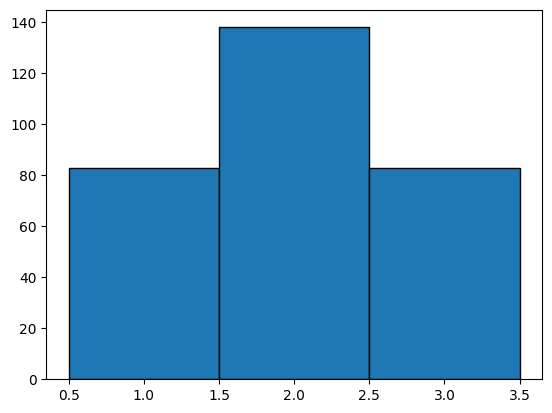

In [566]:

plt.hist(df['miejsce'], np.arange(0.5, 4),  edgecolor = 'black')
plt.show()

**WIEK**

Wiek mieszkańców Bajtocji ma rozkład normalny - w szczególności widać to na wykresie kwantyl-kwantyl. Przy średnim wieku równym 56.23, połowa ma ponad 56.5 lat, a druga mniej.

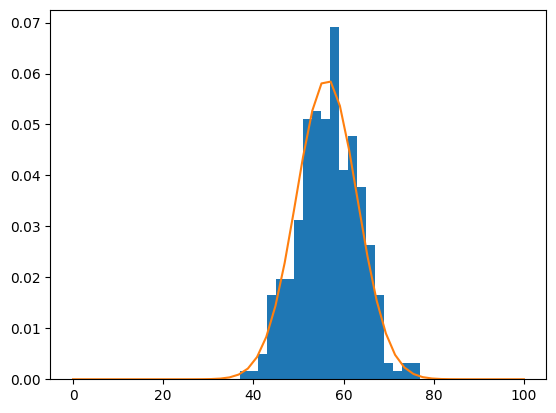

In [567]:
x = np.linspace(0, 100)
y = norm.pdf(x, np.mean(df['wiek']), np.std(df['wiek']))
plt.hist(df['wiek'], bins = 20, density = True)
plt.plot(x,y)
plt.show()

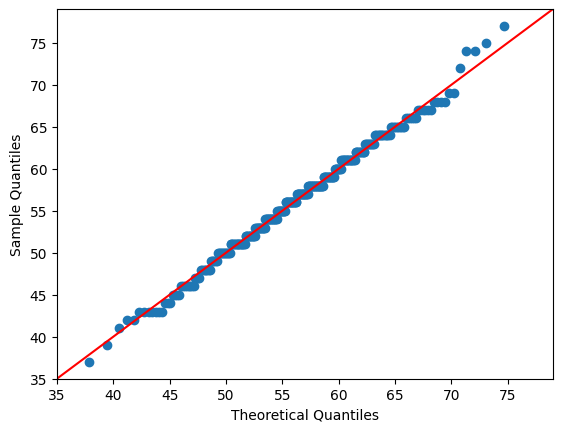

In [568]:
sm.qqplot(df['wiek'], line = '45', loc = np.mean(df['wiek']), scale = np.std(df['wiek']));

In [569]:
sw_test_wiek = shapiro(df['wiek'])
print('p-value = ' + str(sw_test_wiek.pvalue))

p-value = 0.42118239402770996


Również p-value w teście Shapiro-Wilka mówi, że nie możemy odrzucić tezy o normalności rozkładu wieku w populacji przy poziomie istotności 0.01.

**WAGA**

Waga mieszkańców Bajtocji jest zmienną o rozkładzie normalnym. Średnia waga mieszkańca w naszej próbie to 79.8kg, wartość bardzo bliska medianie.

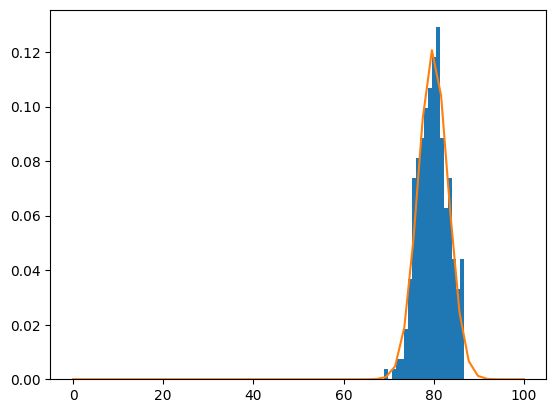

In [570]:
x = np.linspace(0, 100)
y = norm.pdf(x, np.mean(df['waga']), np.std(df['waga']))
plt.hist(df['waga'], bins = 20, density = True)
plt.plot(x,y)
plt.show()

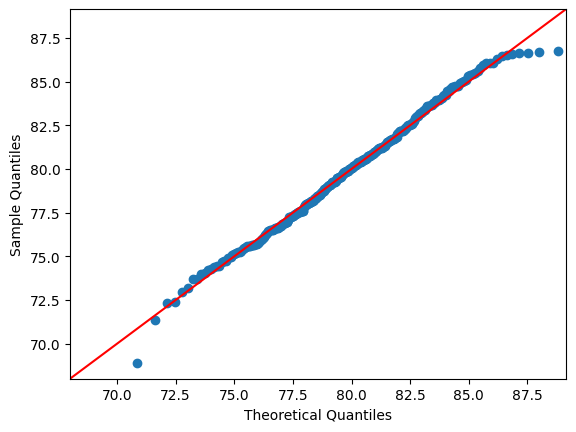

In [571]:
sm.qqplot(df['waga'], line = '45', loc = np.mean(df['waga']), scale = np.std(df['waga']));

In [572]:
sw_test_waga = shapiro(df['waga'])
print('p-value = ' + str(sw_test_waga.pvalue))

p-value = 0.15905901789665222


Również p-value w teście Shapiro-Wilka mówi, że nie możemy odrzucić tezy o normalności rozkładu wagi w populacji przy poziomie istotności 0.01.

 **DOCHÓD**

Średni dochód mieszkańca to ok. 1389 bajtalarów. Odchylenie standardowe to ok. 661 bajtalarów. Najbogatszy mieszkaniec w naszej próbie zarabia ok. 7.41 raza więcej od mieszkańca o najniższym dochodzie. Rozkład jest daleki od normalnego - mediana wynosi 1181.35, co jest znacznie bliżej najniższego zarobku, niż najwyższego.

In [573]:
df['dochod'].median()

1181.35

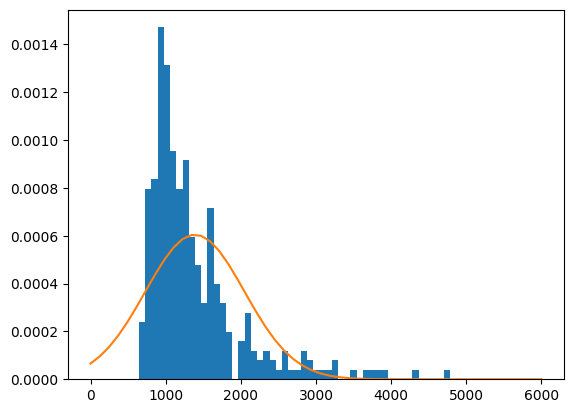

In [574]:
x = np.linspace(0, 6000)
y = norm.pdf(x, np.mean(df['dochod']), np.std(df['dochod']))
plt.hist(df['dochod'], bins = 50, density = True)
plt.plot(x,y)
plt.show()

In [575]:
sw_test_dochod = shapiro(df['dochod'])
print('p-value = ' + str(sw_test_dochod.pvalue))

p-value = 1.8411225807961608e-19


Jako, że p-value wyraźnie poniżej poziomu istotności 0.01, odrzucamy rozkład normalny dochodu w społeczeństwie Bajtocji.

**WYDATKI NA ŻYWNOŚĆ**

Mieszkaniec Bajtocji z naszego zbioru danych wydaje średnio 235.57 bajtalarów miesięcznie na żywność. Rozkład ponownie nie przypomina rozkładu normalnego - względnie dużo osób wydaje na jedzenie nieznacznie mniej od maksimum - wynosi ono 301.69 bajtalarów, a ponad połowa mieszkańców wydaje ponad 250 bajtalarów miesięcznie na żywność.

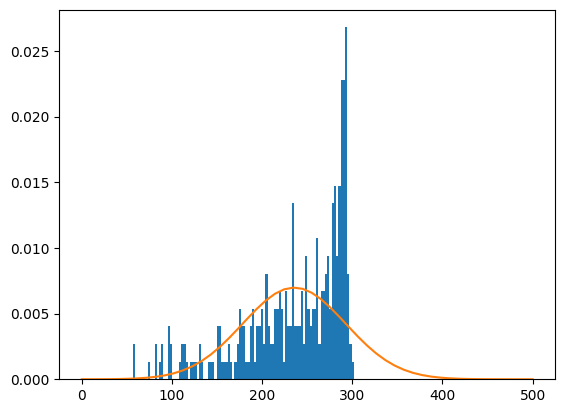

In [576]:
x = np.linspace(0, 500)
y = norm.pdf(x, np.mean(df['wydatki_zyw']), np.std(df['wydatki_zyw']))
plt.hist(df['wydatki_zyw'], bins = 100, density = True)
plt.plot(x,y)
plt.show()

In [577]:
sw_test_zyw = shapiro(df['wydatki_zyw'])
print('p-value = ' + str(sw_test_zyw.pvalue))

p-value = 8.07167256888482e-15


Jako, że p-value wyraźnie poniżej poziomu istotności 0.01, odrzucamy rozkład normalny wydatków na żywność w społeczeństwie Bajtocji.

**OSZCZĘDNOŚCI**

Oszczędności mieszkańców Bajtocji nie wydają się mieć rozkładu normalnego. Mediana wynosi ok. 887 bajtalarów, a mediana ok. 722 bajtalarów.

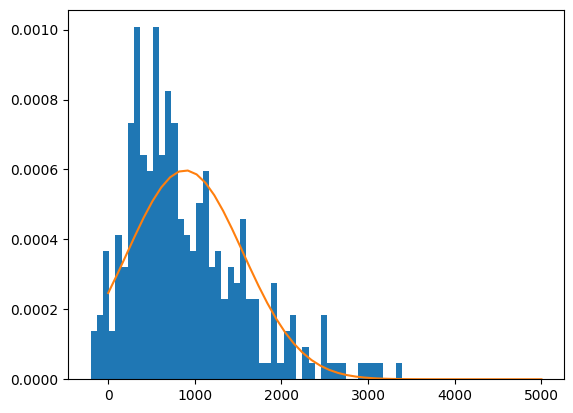

In [578]:
x = np.linspace(0, 5000)
y = norm.pdf(x, np.mean(df['oszczednosci']), np.std(df['oszczednosci']))
plt.hist(df['oszczednosci'], bins = 50, density = True)
plt.plot(x,y)
plt.show()

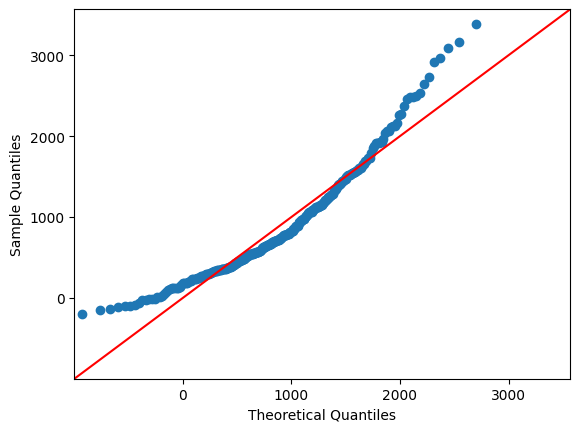

In [579]:
sm.qqplot(df['oszczednosci'], line = '45', loc = np.mean(df['oszczednosci']), scale = np.std(df['oszczednosci']));

In [580]:
sw_test_osz = shapiro(df['oszczednosci'])
print('p-value = ' + str(sw_test_osz.pvalue))

p-value = 7.383972600027988e-11


Jako, że p-value wyraźnie poniżej poziomu istotności 0.01, odrzucamy rozkład normalny oszczędności w społeczeństwie Bajtocji.

# Zadanie 2

<Axes: >

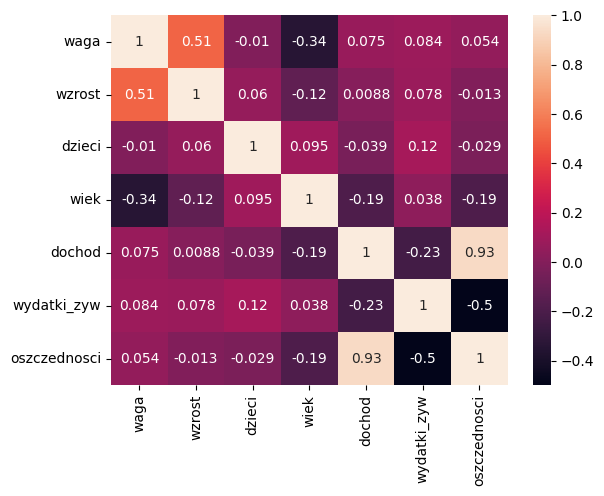

In [581]:
df_quantitative = df[['waga','wzrost' ,'dzieci','wiek', 'dochod' ,'wydatki_zyw', 'oszczednosci']]
sb.heatmap(df_quantitative.corr('spearman'), annot = True)

<Axes: >

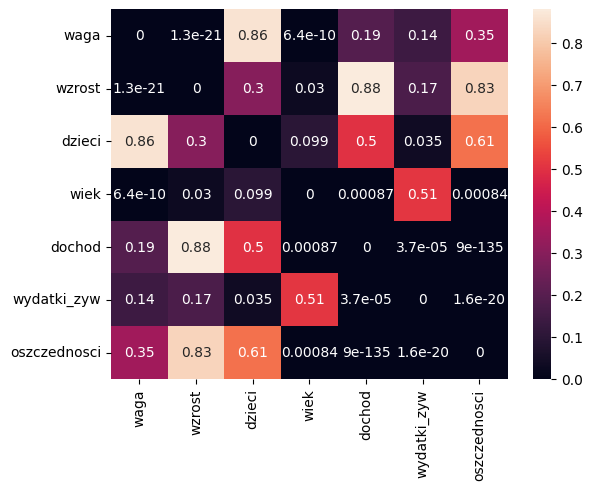

In [582]:
l = len(df_quantitative.columns)
p_values = [[0 for x in range(l)] for y in range(l)]

for i in range(l):
  for j in range(l):
    p_values[i][j] = spearmanr(df_quantitative.iloc[:, i], df_quantitative.iloc[:, j]).pvalue
p_val_df = pd.DataFrame(p_values, columns = df_quantitative.columns, index =df_quantitative.columns )
sb.heatmap(p_val_df, annot = True)

Hipotezą zerową jest brak korelacji dwóch zmiennych.

Jako, że część zmiennych nie ma rozkładu normalnego, bezpieczniej będzie użyć korelacji Spearmana. Użyjemy poziomu istotności α = 0.05.

Powyżej widoczne są heatmapy współczynników korelacji Spearmana oraz odpowiadające im p-value.

Najwyraźniejsza dodatnia korelacja zachodzi przy zmiennych dochód i oszczędności. Przy wysokiej wartości współczynnika Spearmana (0.93) i p-value bardzo bliskim zera (9e-135)  odrzucamy hipotezę zerową i uznajemy istnienie korelacji.

Inną  dodatnią korelacją jest związek między wzrostem a wagą. Też taki wniosek wydaje się logiczny, gdyż wyższe osoby często mają większą masę kostną i mięśniową. Bardzo niskie p-value (1.3e-21) powoduje, że uznajemy istnienie korelacji.

Mamy również dodatnią korelację
między zmiennymi wydatki na żywność i liczba dzieci (p-value = 0.035). To p-value jest dość blisko poziomu istotności, ale wciąż odrzucimy brak korelacji.

Wśród ujemnych korelacji, możemy zauważyć wyraźny związek między wydatkami na żywność a oszczędnościami (p-value =1.6e-20), między wiekiem a oszczędnościami (p-value = 0.00084), wiekiem a wagą (p-value = 6.4e-10),  dochodem a wydatkami na żywność(p-value =3.7e-5). Tutaj, wartości p-value są na tyle małe, że możemy uznać te korelacje za obecne w populacji Bajtocji.
Uznajemy też korelację między wzrostem a wiekiem (p-value = 0.03), jednak ta wartość jest  dość blisko poziomu istotności.

Szczególnie ciekawą jest  ujemna korelacja między dochodem a wydatkami na żywność - intuicja podpowiadałaby inaczej, że bardziej zamożni będą wydawać na żywność więcej.

W reszcie par zmiennych nie możemy odrzucić braku korelacji zmiennych - p-value powyżej poziomu istotności.

In [583]:
df_qualitative = df[['plec', 'miejsce', 'jednoos']]

a, b ,c ,d = chi2_contingency(pd.crosstab(df_qualitative['plec'], df_qualitative['miejsce']))
b
for i in df_qualitative.columns:
  for j in df_qualitative.columns:
    if i < j:
      chi2_val, p, dof, expected = chi2_contingency(pd.crosstab(df_qualitative[i], df_qualitative[j]))
      print('Zmienne: ' + i +", " + j)
      print('chi-squared: ' + str(chi2_val))
      print('p-value:' + str(p) + '\n')



Zmienne: miejsce, plec
chi-squared: 2.9973658607422933
p-value:0.22342423171950018

Zmienne: jednoos, plec
chi-squared: 0.13841187645610253
p-value:0.7098649541109077

Zmienne: jednoos, miejsce
chi-squared: 0.5238551616221235
p-value:0.7695667530897057



Bardzo duże wartości p-value dla każdej pary zmiennych jakościowych wskazują, że nie możemy odrzucić niezależności tych zmiennych.

# Zadanie 3

In [584]:
kobiety = df[df['plec'] == 1]
mezczyzni = df[df['plec'] == 2]


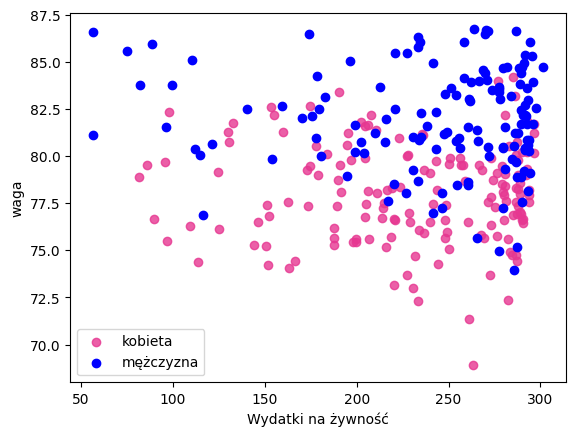

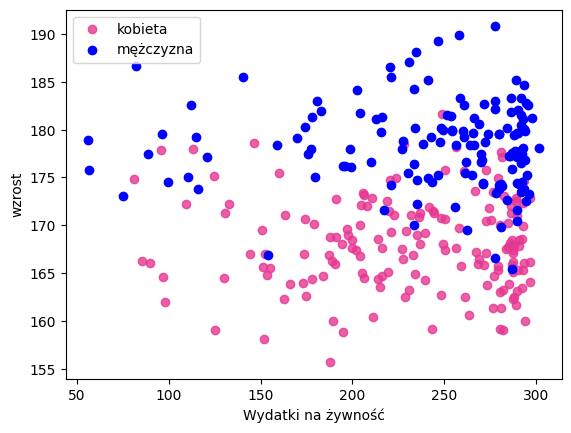

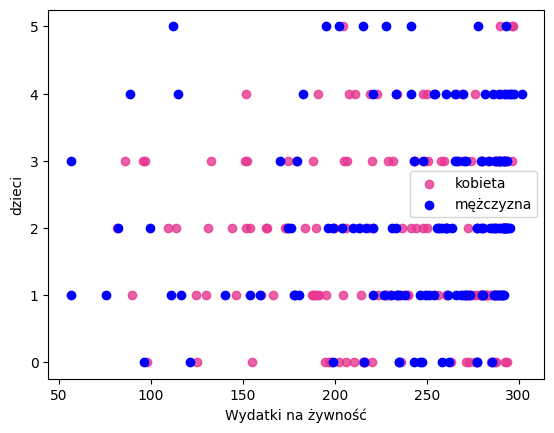

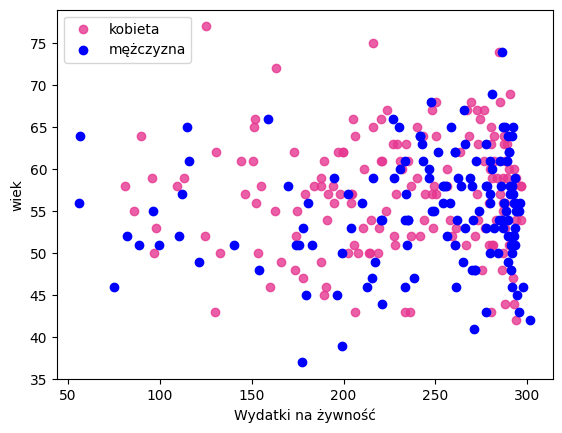

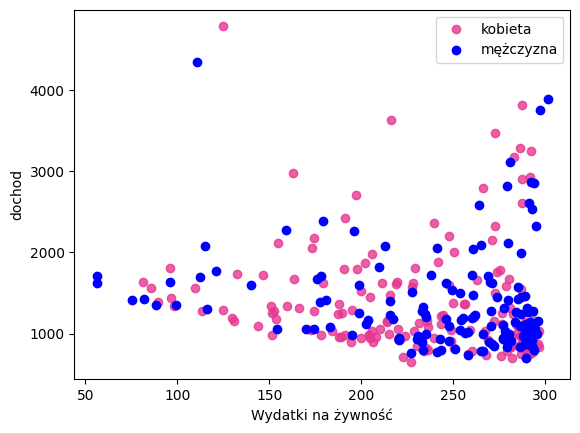

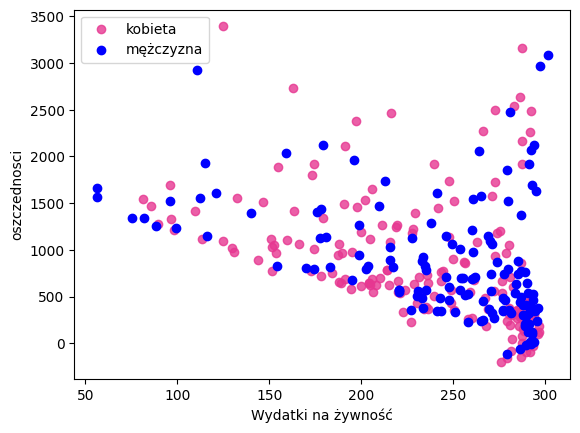

In [585]:

for i in df_quantitative.columns:
  if i != 'wydatki_zyw':
    plt.scatter(kobiety['wydatki_zyw'], kobiety[i], color = '#e63791cc')
    plt.scatter(mezczyzni['wydatki_zyw'], mezczyzni[i], color =  'blue')
    plt.xlabel('Wydatki na żywność')
    plt.ylabel(i)
    plt.legend(['kobieta','mężczyzna'])
    plt.show()

Z racji faktu, że względnie dużo osób wydaje na żywność blisko maksymalnej wartości takich wydatków w próbie, widzimy na każdym wykresie większą obecność punktów z prawej strony.
W kontekście uzyskanych wcześniej korelacji, waga, wzrost i wiek nie mają wyraźnego związku z wydatkami na żywność. Przy oszczędnościach i dochodzie widzimy, że wydatki na żywność rzeczywiście spadają przy ich wzroście - ujemna korelacja, przyjęta w poprzednim zadaniu, jest zauważalna.

Dodatkowo rozróżniłem kolorami kobiety i mężczyzn, w nadziei na rejestrowalne interesujące obserwacje, jednak takich nie widzę.

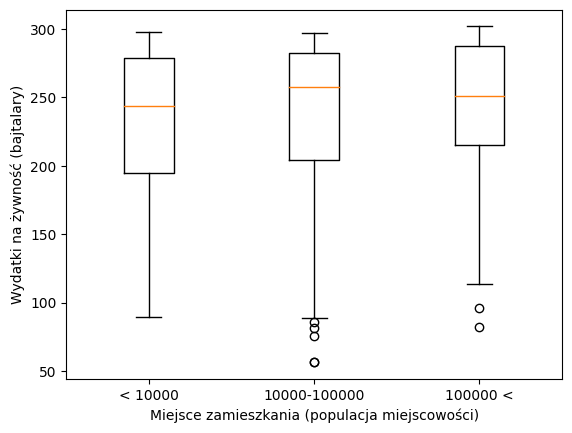

In [586]:
plt.boxplot([df[df['miejsce'] == 1]['wydatki_zyw'], df[df['miejsce'] == 2]['wydatki_zyw'],
           df[df['miejsce'] == 3]['wydatki_zyw']], labels = ['< 10000', '10000-100000', '100000 <'])
plt.xlabel('Miejsce zamieszkania (populacja miejscowości)')
plt.ylabel('Wydatki na żywność (bajtalary)')
plt.show()

Na powyższym wykresie pudełkowym widzimy, że w naszej próbie:
- najwyższa mediana wydatków jest w miejscowościach o populacji 10000-100000 mieszkańców
- zarówno pierwszy, jak i trzeci kwartyl są najniższe w miejscowościach o ludności do 10000, a najwyższe w miejscowościach o ponad 100000 mieszkańcach
- mediana jest najwyższa w miejscowościach od 10000 do 100000 mieszkańców

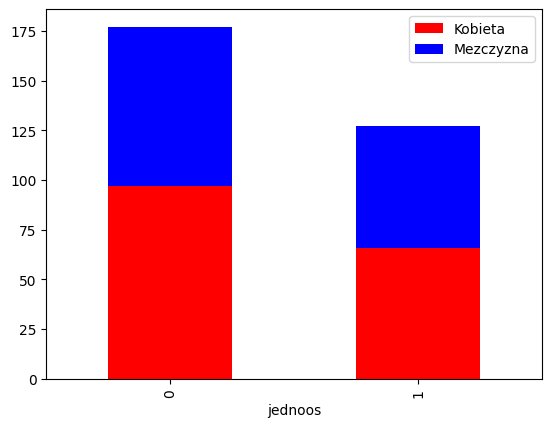

In [587]:

df_plot = df.groupby(['jednoos', 'plec']).size().reset_index().pivot(columns='plec', index='jednoos', values=0)
df_plot.plot(stacked = True, kind = 'bar', color = ['red', 'blue'] )
plt.legend(['Kobieta', 'Mezczyzna'])

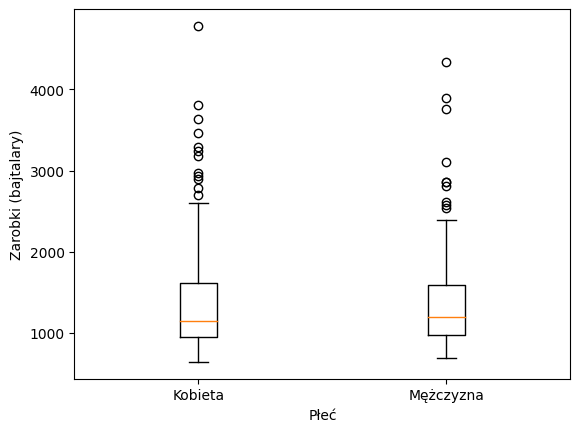

In [588]:
plt.boxplot([df[df['plec'] == 1]['dochod'], df[df['plec'] == 2]['dochod']],
            labels = ['Kobieta', 'Mężczyzna'])
plt.xlabel('Płeć')
plt.ylabel('Zarobki (bajtalary)')
plt.show()

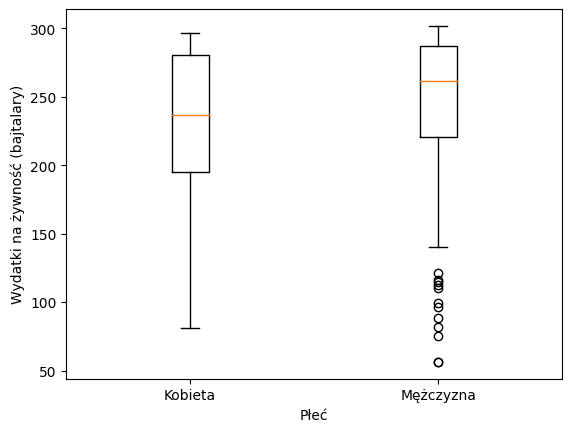

In [589]:
plt.boxplot([df[df['plec'] == 1]['wydatki_zyw'], df[df['plec'] == 2]['wydatki_zyw']],
            labels = ['Kobieta', 'Mężczyzna'])
plt.xlabel('Płeć')
plt.ylabel('Wydatki na żywność (bajtalary)')
plt.show()

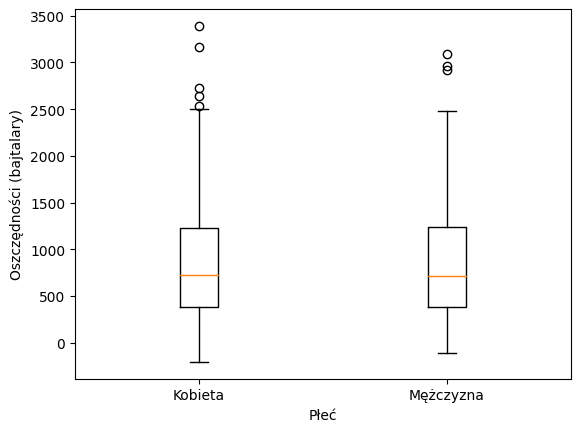

In [590]:
plt.boxplot([df[df['plec'] == 1]['oszczednosci'], df[df['plec'] == 2]['oszczednosci']],
            labels = ['Kobieta', 'Mężczyzna'])
plt.xlabel('Płeć')
plt.ylabel('Oszczędności (bajtalary)')
plt.show()

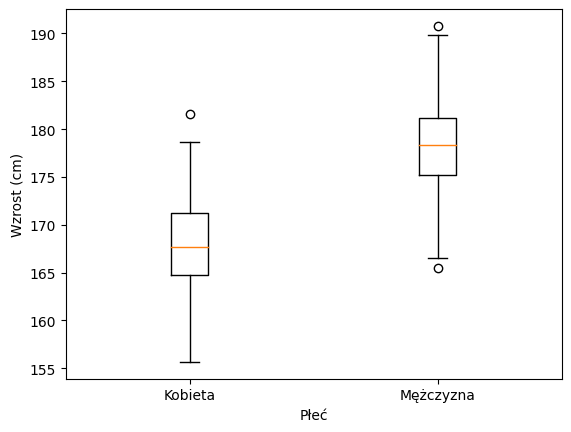

In [591]:
plt.boxplot([df[df['plec'] == 1]['wzrost'], df[df['plec'] == 2]['wzrost']],
            labels = ['Kobieta', 'Mężczyzna'])
plt.xlabel('Płeć')
plt.ylabel('Wzrost (cm)')
plt.show()

Powyżej jeszcze kilka wykresów pudełkowych względem płci. Widzimy, że zarobki kobiet i mężczyzn w Bajtocji są porównywalne, podobnie jak oszczędności. Mężczyźni natomiast wydają wyraźnie więcej na jedzenie i są na ogół wyżsi (wykres pudełkowy dla mężczyzn przypomina przesunięty o jeden kwartyl w górę wykres pudełkowy dla kobiet).

# Zadanie 4
Rozkład zmiennej wiek jest dość bliski rozkładowi normalnemu (nie odrzuciliśmy hipotezy o wartości tego rozkładu). Centralne Twierdzenie Graniczne dodatkowo wspomaga nas w liczeniu przedziałów ufności, bo dla względnie dużej próbki (304) nasz statystyka dla naszego t-testu będzie tym bardziej przypominać rozkład normalny.

Wówczas, jako że nie znamy odchylenia standardowego w populacji, użyjemy testu t-studenta dla jednej próbki do obliczenia przedziałów ufności dla średniej w populacji.

In [592]:
sample_mean = np.mean(df['wiek'])
unbiased_sample_std = np.std(df['wiek'], ddof = 1) # ddof = 1 so that std is unbiased
alpha = 0.01
N = len(df)
diff = tstud.ppf(df = N-1, q = 1-alpha/2) * unbiased_sample_std/np.sqrt(N)
left = sample_mean - diff
right = sample_mean + diff
print('Przedział ufności dla średniej w populacji na poziomie ufności 0.99: (' + str(left)
+ ', ' + str(right) + ')')




Przedział ufności dla średniej w populacji na poziomie ufności 0.99: (55.25152156054645, 57.26821528155881)


In [593]:
sample_mean

56.25986842105263

W przypadku odchylenia standardowego, użyjemy testu 𝛘2. Tutaj założenie o normalności rozkładu jest bardziej istotne. Mimo, iż nie ma pewności, czy zmienna ma rozkład normalny, to rozkład ten nie odbiega w dużym stopniu od normalnego, nie odrzuciliśmy też możliwości, że zmienna ta ma rozkład normalny. Użyjemy zatem tego testu.




In [594]:
sample_variance = np.var(df['wiek'], ddof=1)
left2 = n * sample_variance / chi2.ppf(df=N-1, q=1-alpha/2)
right2 = n * sample_variance / chi2.ppf(df=N-1, q=alpha/2)
print('Odchylenie standardowe: '  + str(np.sqrt(left)) + ' ' + str(np.sqrt(right)))

Odchylenie standardowe: 7.433136724192987 7.567576579167126


In [595]:
delta1 = -np.sqrt(N) *  norm.ppf(0.25)
delta2 =- np.sqrt(N) *  norm.ppf(0.5)
delta3 = -np.sqrt(N) *  norm.ppf(0.75)
print(delta1, delta2, delta3)

11.760130638234855 -0.0 -11.760130638234855


Dla kwartyli, skorzystamy z metody zawartej w książce *Lawless, Jerald F. 2003, "Statistical Models and Methods for Lifetime Data".* Aby użyć tej metody, również potrzebujemy założenia o normalnym rozkładzie zmiennej. Ponownie, jak w przykładzie z odchylebniem standardowym, używamy takiego założenia biorąc poprawkę na to, że nie mamy całkowitej pewności na ten temat i przez to wyniki mogą zostać zaburzone. Wierzymy jednak, że to zaburzenie nie będzie zanadto duże.


In [596]:
left1 = sample_mean - nct.ppf(q = 1- alpha/2, df = N - 1, nc = delta1) * unbiased_sample_std /np.sqrt(N)
right1 = sample_mean - nct.ppf(q = alpha/2, df = N - 1, nc = delta1) * unbiased_sample_std /np.sqrt(N)
left3 = sample_mean - nct.ppf(q = 1 - alpha/2, df = N - 1, nc = delta3) * unbiased_sample_std /np.sqrt(N)
right3 = sample_mean - nct.ppf(q = alpha/2, df = N - 1, nc = delta3) * unbiased_sample_std /np.sqrt(N)
print('Pierwszy kwartyl: (' +  str(left1) + ' ' + str(right1)+  ')')

Pierwszy kwartyl: (50.51442582338502 52.75005619264797)


In [597]:
left2 = sample_mean - nct.ppf(q = 1- alpha/2, df = N - 1, nc = delta2) * unbiased_sample_std /np.sqrt(N)
right2 = sample_mean - nct.ppf(q = alpha/2, df = N - 1, nc = delta2) * unbiased_sample_std /np.sqrt(N)
print('Drugi kwartyl: (' +  str(left2) + ' ' + str(right2)+  ')')

Drugi kwartyl: (55.25152156054516 57.2682152815601)


In [598]:
left3 = sample_mean - nct.ppf(q = 1 - alpha/2, df = N - 1, nc = delta3) * unbiased_sample_std /np.sqrt(N)
right3 = sample_mean - nct.ppf(q = alpha/2, df = N - 1, nc = delta3) * unbiased_sample_std /np.sqrt(N)
print('Trzeci kwartyl: (' +  str(left3) + ' ' + str(right3)+  ')')

Trzeci kwartyl: (59.76968064945729 62.00531101872024)


# Zadanie 5

Jako, że próbka jest spora i reprezentatywna, dzielimy ją na klasy ekonomiczne na podstawie kwantyli.

In [599]:
prog_1 = df['dochod'].quantile(0.25)
prog_2 = df['dochod'].quantile(0.75)
prog_3 = df['dochod'].quantile(0.9)
print(prog_1, prog_2, prog_3)

965.83 1613.9475 2194.527


In [600]:
klasa_nizsza = df[df['dochod'] <= prog_1]
klasa_srednia = df[df['dochod'] > prog_1][df['dochod'] <= prog_2]
klasa_srednia_wyzsza = df[df['dochod'] > prog_2][df['dochod'] <= prog_3]
klasa_wyzsza = df[df['dochod'] >= prog_3]

<ipython-input-600-6898310aadbc>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-600-6898310aadbc>:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Aby przeanalizować miary zróżnicowania, obliczymy indeks Giniego dla populacji. Jest to miara zróżnicowania szczególnie dobrze sprawdzająca się w nierównościach dochodowych.

In [601]:
def gini(df):
    x = np.array(df)
    mad = np.abs(np.subtract.outer(x,x)).mean() # mean absolute difference
    rmad = mad/np.mean(x) # relative mean absolute difference
    gini_co = 0.5 * rmad
    return gini_co

In [602]:
print('Wartości współczynnika Giniego:')
print('Klasa niższa:', gini(np.array(klasa_nizsza['wydatki_zyw'])))
print('Klasa średnia:',gini(np.array(klasa_srednia['wydatki_zyw'])))
print('Klasa średnia wyższa:',gini(np.array(klasa_srednia_wyzsza['wydatki_zyw'])))
print('Klasa wyższa:',gini(np.array(klasa_wyzsza['wydatki_zyw'])))
print('Cała próba:',gini(np.array(df['wydatki_zyw'])))

Wartości współczynnika Giniego:
Klasa niższa: 0.06748590905309047
Klasa średnia: 0.14009074323670181
Klasa średnia wyższa: 0.1815694718482499
Klasa wyższa: 0.11428533828001357
Cała próba: 0.13074805906361678


Widzimy, że największe zróżnicowanie wydatków na żywność ma miejsce w klasie średniej wyższej, a najmniejsze w klasie niższej. Być może osoby z klasy niższej wydają mniej, aby móc więcej oszczędzić, w porównaniu do osób z wyższych klas, które mogą sobie pozwolić na droższe produkty.

# Zadanie 6
W pierwszym punkcie, stawiamy hipotezę zerową:
H_0 - kobiety nie cechują się wyższymi wartościami oszczędności niż mężczyzni.
Do sprawdzenia prawdziwości tej hipotezy użyjemy testu U Manna-Whitneya. Najpierw sprawdzimy, czy wariancje są wystarczająco podobne w obu grupach.

In [603]:
oszczednosci_kobiet = df[df['plec'] == 1]['oszczednosci']
np.var(oszczednosci_kobiet) # kobiety

481476.8002419888

In [604]:
oszczednosci_mezczyzn = df[df['plec'] == 2]['oszczednosci']
np.var(oszczednosci_mezczyzn) # mężczyźni

403906.3103780091

Wariancje różnią się, ale nie aż tak drastycznie, aby test Manna-Whitneya byłby do odrzucenia.

In [605]:
result = mannwhitneyu(oszczednosci_kobiet, oszczednosci_mezczyzn, use_continuity = False, alternative = 'greater')
print(result.statistic)
print(result.pvalue)

11708.0
0.3884862703250642


In [606]:
result = mannwhitneyu( oszczednosci_mezczyzn, oszczednosci_kobiet, use_continuity = False)
result.pvalue

0.7769725406501284

Patrząc na test U przy innej hipotezie zerowej, mianowicie równości rozkładów zmiennych, widzimy, że bardzo ciężko jest ją odrzucić - p-value jest bardzo wysokie. Dlatego też, biorąc pod uwagę powyższe wnioski, stwierdzam, że nie można stwierdzić na podstawie danych, czy kobiety oszczędzają więcej od mężczyzn, a nawet jeśli, to ta różnica nie jest istotna statystycznie.

Zgodnie z poziomem istotności α = 0.01, nie możemy odrzucić hipotezy zerowej o tym, że kobiety nie oszczędzają więcej od mężczyzn. Patrząc na wykres poniżej, rzeczywiście nie wydaje się, by któraś płeć miałaby przeważać w oszczędnościach.

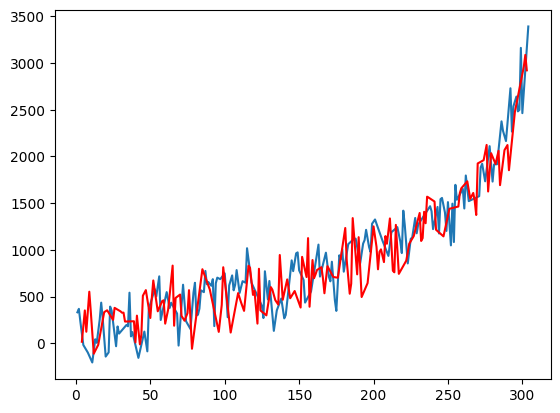

In [607]:
plt.plot(oszczednosci_kobiet)
plt.plot(oszczednosci_mezczyzn, color = 'r')
plt.show()

Teraz zajmę się punktem drugim, czyli sprawdzeniem korelacji proporcji wydatków na żywność względem dochodu wobec oszczędności. Ponownie wykorzystam test korelacji Spearmana, bo ma mniej ograniczeń niż test korelacji Pearsona (brak założenia o rozkładzie normalnym).

In [608]:
proporcje_wydatkow_na_zywnosc = df['wydatki_zyw'] / df['dochod']
oszczednosci = df['oszczednosci']

In [609]:
spearmanr(proporcje_wydatkow_na_zywnosc, oszczednosci)

SignificanceResult(statistic=-0.9726091116445553, pvalue=2.0103756749114015e-193)

In [610]:
px.scatter(x = proporcje_wydatkow_na_zywnosc, y = oszczednosci)

Jak widzimy, p-value testu jest bardzo małe, wartość testu ujemna, a na wykresie możemy zauważyć, że rzeczywiście ta korelacja ujemna wydaje się mieć miejsce. Zatem z niemal 100% pewnością możemy powiedzieć, że ta korelacja występuje w populacji.

Co do punktu trzeciego, możemy po prostu wyliczyć średnią wagę kobiet w próbie:


In [611]:
waga_kobiet = df[df['plec']== 1]['waga']
print(waga_kobiet.mean())

78.01662576687119


Jednak zakładając pomyłkę w treści, sprawdzimy to samo dla populacji kobiet w Bajtocji.

H-0 - waga kobiet w populacji jest mniejsza/równa 56 kg.

H-1 waga kobiet w populacji jest większa niż 56 kg.

Jako, że waga ma najprawdopodobniej rozkład normalny, możemy dobrze wyliczyć przedziały ufności.

In [612]:
mean_0 = 56
N = len(waga_kobiet)
T = ((waga_kobiet.mean() - mean_0) / np.std(waga_kobiet)) * np.sqrt(N)
p_value = 1 - tstud.cdf(T, N-1)

p-value jest tutaj tak niesamowicie małe, że nawet Python uznaje je za 0. W takim wypadku odrzucamy hipotezę zerową i uznajemy, że średnia waga kobiet w populacji jest większa od 56 kg.

Naszą dodatkową hipotezą będzie, że dochód w populacji Bajtocji ma rozkład wykładniczy o wartości λ = 1.01.

(645.27, 744.0457236842103)
Statystyka testowa: 0.12994942096520892
Wartość p: 6.174954278042687e-05


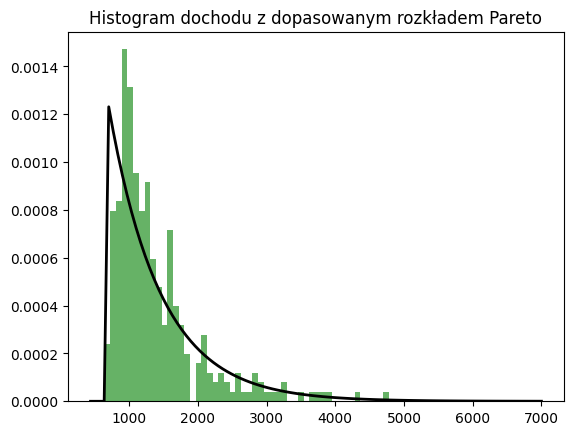

In [613]:
import numpy as np
from scipy.stats import expon
from scipy.stats import kstest
import matplotlib.pyplot as plt


dochod = np.array(df['dochod'])

parametry =expon.fit(dochod)
p0 = parametry[0]
p1 = parametry[1]


p1 *= 1.01
par2 = [p0, p1]

print(parametry)

statystyka, p_value = kstest(dochod, 'expon', args=par2)

print("Statystyka testowa:", statystyka)
print("Wartość p:", p_value)

plt.hist(dochod, bins=50, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()

x = np.linspace(xmin, 7000, 100)
pdf = expon.pdf(x, *par2)
plt.plot(x, pdf, 'k-', linewidth=2)
plt.title("Histogram dochodu z dopasowanym rozkładem Pareto")
plt.show()

Niestety, nasze p-value równe ok. 0.0035 jest mniejsze od poziomu istotności 0.01, a zatem odrzucamy tę hipotezę.

# Zadanie 7


In [614]:
dependent_var = df['wydatki_zyw']
predictors = df.drop(columns=['wydatki_zyw'])
predictors = pd.get_dummies(predictors, columns = ['plec'], prefix = 'plec', drop_first = True, dtype = int)
predictors = pd.get_dummies(predictors, columns = ['jednoos'], prefix = 'jednoos', drop_first = True, dtype = int)
predictors = pd.get_dummies(predictors, columns = ['miejsce'], prefix = 'miejsce', drop_first = True, dtype = int)
predictors = sm.add_constant(predictors)
predictors

,const,waga,wzrost,dzieci,wiek,dochod,oszczednosci,plec_2,jednoos_1,miejsce_2,miejsce_3
id,,,,,,,,,,,
1,1.0,80.96,171.07,4,55,708.72,332.61,0,0,0,1
2,1.0,79.25,171.25,2,58,804.21,369.51,0,0,1,0
3,1.0,73.69,167.48,1,63,645.27,232.55,0,0,0,0
4,1.0,80.84,179.87,2,56,793.26,17.62,1,0,0,1
5,1.0,76.92,171.01,3,64,703.44,-17.29,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
300,1.0,78.18,167.66,0,65,3632.65,2463.14,0,1,1,0
301,1.0,82.57,181.19,4,46,3751.99,2961.96,1,1,0,0
302,1.0,84.74,178.04,4,42,3893.04,3086.41,1,1,0,1


In [615]:
model = sm.OLS(dependent_var, predictors)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            wydatki_zyw   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     61.90
Date:                Sun, 12 May 2024   Prob (F-statistic):           2.51e-66
Time:                        20:41:42   Log-Likelihood:                -1488.6
No. Observations:                 304   AIC:                             2999.
Df Residuals:                     293   BIC:                             3040.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          226.2224     90.953      2.487   

In [616]:
dependent_var

id
1      222.89
2      236.60
3      227.18
4      293.88
5      289.55
        ...  
300    216.29
301    297.58
302    301.69
303    110.60
304    124.69
Name: wydatki_zyw, Length: 304, dtype: float64

Współczynnik R^2, mówiący o tym, jaka część wariancji jest tłumaczona regresją liniową, wynosi 0.679. Wynik wydaje się dość solidny, chociaż warto spróbować go poprawić. Wynik testu F łącznej istotności mówi o tym, że możemy odrzucić hipotezę zerową mówiącą o tym, że wyzerowanie wszystkich predyktorów dałoby nam lepszą predykcję - regresja liniowa jest w tym wypadku dobrym rozwiązaniem- p-value jest niesamowicie małe, a wynik testu jest o wiele większy od 1.

Co do poszczególnych predyktorów, biorąc poziom istotności α = 0.01, widzimy, że sporo z nich prawdopodobnie nie ma wpływu na regresję liniową, jak choćby miejsce_3 czy wzrost. Z pewnością wpływ mają oszczędności i dochód.



In [617]:
predictions = results.get_prediction()
predictions_summary = predictions.summary_frame()


In [618]:
residuals = dependent_var.sub(predictions_summary['mean'])
residuals = residuals.to_frame('res')


In [619]:
mean_res = residuals.mean()
std_res = residuals.std()
st_res = (residuals - mean_res)/ std_res
st_res = np.sqrt(abs(st_res))


1. Wyraźnie widzimy, że residuals nie układają się równomiernie wzdłuż osi OY, lecz wydają się przypominać funkcję kwadratową od wartości predykcji o ujemnym współczynniku. Nie spełnia to założenia KMRL o liniowości formy funkcyjnej.

In [620]:
aux = residuals.join(predictions_summary['mean'])
fig = px.scatter(aux, 'mean', 'res')
fig.add_scatter(x=[100,320], y = [0,0], showlegend=False)

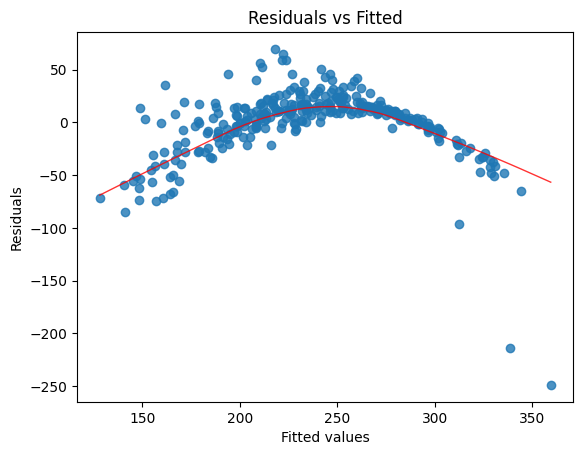

In [621]:
from statsmodels.graphics.gofplots import ProbPlot
import seaborn as sns
import matplotlib.pyplot as plt
model_fitted_y = results.fittedvalues
model_residuals = results.resid
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.regplot(x=model_fitted_y, y=model_residuals,
                                scatter=True,
                                ci=False,
                                lowess=True,
                                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

2. Widzimy, że na wykresie ustantadyzowanych reszt wobec dopasowanych wartości, reszty te nie układają się wzdłuż poziomej prostej. Trójkątne kształty na wykresie wskazują na heteoskadystyczność składnika losowego.

In [622]:
aux = st_res.join(predictions_summary['mean'])
px.scatter(aux, 'mean', 'res')


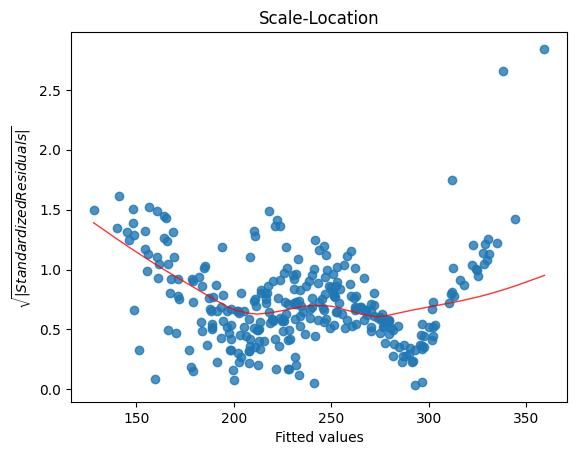

In [623]:
from statsmodels.graphics.gofplots import ProbPlot
import seaborn as sns
import matplotlib.pyplot as plt

model_fitted_y = results.fittedvalues
model_residuals = results.resid
model_norm_residuals = results.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

plot_lm_2 = plt.figure()
sns.regplot(x=model_fitted_y, y=model_norm_residuals_abs_sqrt,
            scatter=True,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_2.axes[0].set_title('Scale-Location')
plot_lm_2.axes[0].set_xlabel('Fitted values')
plot_lm_2.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

3. Na wykresie kolejnych wartości składników losowych zauważamy trend - pod wartości zaczynają rosnąć wraz ze wzrostem id. To pozwala nam powiedzieć, że dane te cierpią na autokorelację składnika losowego.

In [624]:
px.scatter(residuals)

4. Na koniec sprawdzimy rozkład wartości składnika losowego - chcemy, aby ten był normalny. Użyjemy wykresu kwantyl-kwantyl. Widzimy, że absoultnie nie przypomina to rozkładu normalnego. Zatem wszystkie założenia KMRL są niespełnione.

In [625]:
np.std(residuals)

res    32.386163
dtype: float64

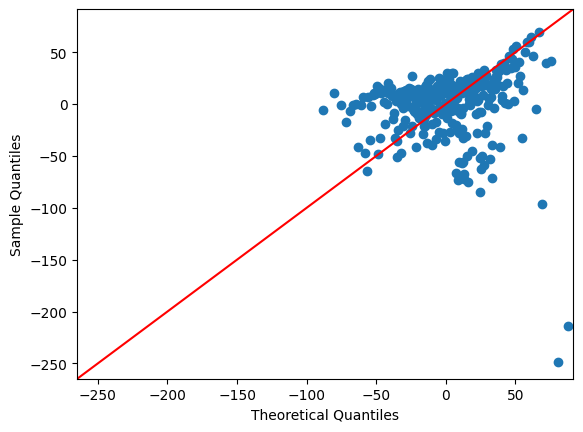

In [626]:
sm.qqplot(residuals, line = '45', loc = np.mean(residuals), scale = np.std(residuals));

Sprawdzimy teraz, czy występuje problem niedokładnej współliniowości.

In [627]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = predictors.columns

#calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(predictors.values, i)
                          for i in range(len(predictors.columns))]

print(vif_data)

         feature          VIF
0          const  2310.884983
1           waga     1.731495
2         wzrost     2.248774
3         dzieci     1.028401
4           wiek     1.203732
5         dochod     9.216374
6   oszczednosci    11.222733
7         plec_2     2.625501
8      jednoos_1     2.422016
9      miejsce_2     1.500755
10     miejsce_3     1.499050


Widzimy, że nasz problem niedokładnej współliniowości występuje dla stałej, oraz zmiennych oszczędności i dochód (przyjąłem próg 5 dla wartości VIF).

Zajmiemy się teraz usunięciem outlierów. Widzieliśmy, że niektóre obserwacje wydają się być podejrzane:

In [628]:
aux = residuals.join(predictions_summary['mean'])
fig = px.scatter(aux, 'mean', 'res')
fig.add_scatter(x=[100,320], y = [0,0], showlegend=False)

Widzimy, że chociażby dwie ostatnie obserwacje charakteryzują się wyjątkowo dużą różnicą predykcji od własnej wartości. Sprawdźmy, które obserwacje mają największą dźwignię:

In [630]:
leverage = results.get_influence().hat_matrix_diag
leverage

array([0.03277973, 0.01620458, 0.02807457, 0.02393589, 0.03084615,
       0.03721511, 0.01846006, 0.04390626, 0.03643671, 0.0354023 ,
       0.04917104, 0.04845309, 0.0351242 , 0.03292386, 0.0358015 ,
       0.02229697, 0.03075296, 0.03298754, 0.02419198, 0.03874667,
       0.06152106, 0.03792393, 0.029511  , 0.03514092, 0.02264503,
       0.0231613 , 0.03914869, 0.0217367 , 0.03173369, 0.05334836,
       0.03283929, 0.02788895, 0.03574777, 0.02518349, 0.04278634,
       0.01624659, 0.03391456, 0.05229505, 0.03550439, 0.0443735 ,
       0.03373948, 0.04068621, 0.03090014, 0.04303162, 0.02777323,
       0.03891558, 0.02450275, 0.0498669 , 0.02930086, 0.02490594,
       0.01980827, 0.04353042, 0.02746363, 0.02816222, 0.05589246,
       0.03061476, 0.02207081, 0.02423621, 0.02263865, 0.03345257,
       0.02317305, 0.03923058, 0.04151475, 0.01736669, 0.05488453,
       0.01954682, 0.02702102, 0.04060866, 0.03539777, 0.04841077,
       0.015049  , 0.0388791 , 0.02570219, 0.02099979, 0.02586

In [658]:
leverage_mean = len(predictors.columns)/len(df)
lev = []
for i in range(len(leverage)):
  if leverage[i] > 2 * leverage_mean:
    lev.append(i + 1)

In [659]:
lev

[206, 254, 299, 300, 301, 302, 303, 304]

Widzimy, że nasze odstające obserwacje wykazują się dużą dźwignią. Pozbędziemy się ich w nadziei, że pomoże to naszemu modelowi.

In [638]:
cleaned_df = df.drop(lev)


In [639]:
cleaned_df

,waga,wzrost,plec,dzieci,wiek,dochod,oszczednosci,jednoos,miejsce,wydatki_zyw
id,,,,,,,,,,
1,80.96,171.07,1,4,55,708.72,332.61,0,3,222.89
2,79.25,171.25,1,2,58,804.21,369.51,0,2,236.60
3,73.69,167.48,1,1,63,645.27,232.55,0,1,227.18
4,80.84,179.87,2,2,56,793.26,17.62,0,3,293.88
5,76.92,171.01,1,3,64,703.44,-17.29,0,1,289.55
...,...,...,...,...,...,...,...,...,...,...
294,74.92,167.55,1,3,59,3173.45,2535.91,1,2,283.44
295,81.57,169.84,2,1,60,3110.79,2478.51,1,2,280.93
296,78.32,172.04,1,2,50,3289.24,2640.79,1,2,286.58


In [678]:
predictors = predictors.drop(lev)

In [685]:
dependent_var = dependent_var.drop(lev)

Postaramy się teraz poprawić nasz model.

In [732]:
model = sm.OLS(dependent_var, predictors)
results =model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            wydatki_zyw   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     159.8
Date:                Sun, 12 May 2024   Prob (F-statistic):          1.31e-110
Time:                        21:28:38   Log-Likelihood:                -1333.9
No. Observations:                 296   AIC:                             2690.
Df Residuals:                     285   BIC:                             2730.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          104.6480     63.122      1.658   

Biorąc nasz poziom istotności 0.01, spróbuję usunąć zmienne o p-wartości większej od niego.

In [706]:
new_predictors = predictors[['oszczednosci', 'dochod']]
new_predictors

,oszczednosci,dochod
id,,
1,332.61,708.72
2,369.51,804.21
3,232.55,645.27
4,17.62,793.26
5,-17.29,703.44
...,...,...
294,2535.91,3173.45
295,2478.51,3110.79
296,2640.79,3289.24


In [692]:
dependent_var

id
1      222.89
2      236.60
3      227.18
4      293.88
5      289.55
        ...  
294    283.44
295    280.93
296    286.58
297    292.73
298    272.89
Name: wydatki_zyw, Length: 296, dtype: float64

In [695]:
model = sm.OLS(dependent_var, new_predictors)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            wydatki_zyw   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              5517.
Date:                Sun, 12 May 2024   Prob (F-statistic):                   7.67e-234
Time:                        21:04:29   Log-Likelihood:                         -1505.2
No. Observations:                 296   AIC:                                      3014.
Df Residuals:                     294   BIC:                                      3022.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
oszczednosci    -0.3549      0.008    -45.376      0.000      -0.370      -0.339
dochod           0.3946      0.006     70.181      0.000       0.384       0.406
==============================================================================
Omnibus:                      116.912   Durbin-Watson:                   1.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              434.121
Skew:                          -1.695   Prob(JB):                     5.39e-95
Kurtosis:                       7.869   Cond. No.                         7.37
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Widzimy znaczną poprawę współczynnika R^2! To znaczy, że nasz nowy model lepiej oddaje zależności między zmiennymi. Jednak pozostaje problem, czy spełniamy założenia KMRL.

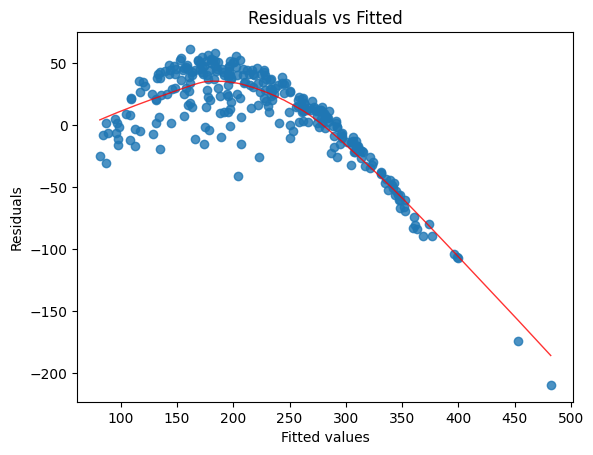

In [696]:
model_fitted_y = results.fittedvalues
# model residuals
model_residuals = results.resid

# here we use matplotlib
# with sns.residplot
# we draw the scatterplot of residuals against the fitted values (scatter=True)
# and we add a regression line
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.regplot(x=model_fitted_y, y=model_residuals,
                                scatter=True,
                                ci=False,
                                lowess=True,
                                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

Widzimy wciąż, że pomimo poprawienia R^2, nie mamy liniowej zależności formy funkcyjnej. Widzimy wciąż, że przypomina to kwadratową zależność - dlatego też spróbujemy coś podnieść do kwadratu w formie funkcyjnej.

Spróbujmy przeanalizować naszą zmienną: wiemy, że zależy ona przede wszystkim od dochodów i oszczędności. Może zatem odejmijmy od dochodów oszczędności - przecież wydatki na żywność to część dochodu, której nie przeznacza się na oszczędności!

In [707]:
x = new_predictors['dochod'] - new_predictors['oszczednosci']

In [709]:
y = [i*i for i in x]

In [858]:
new_predictors = pd.DataFrame()
new_predictors['diff'] = x
new_predictors['diff^2'] = y
new_predictors['wiek'] = predictors['wiek']
new_predictors['dzieci'] = predictors['dzieci']
new_predictors['plec_2'] = predictors['plec_2']


In [859]:
new_predictors = sm.add_constant(new_predictors)

In [860]:
model = sm.OLS(dependent_var, new_predictors)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            wydatki_zyw   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 9.676e+04
Date:                Sun, 12 May 2024   Prob (F-statistic):               0.00
Time:                        22:04:38   Log-Likelihood:                -515.23
No. Observations:                 296   AIC:                             1042.
Df Residuals:                     290   BIC:                             1065.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.6054      0.787     42.690      0.0

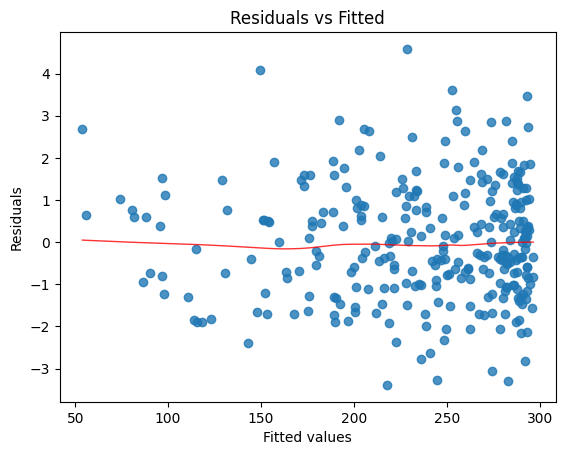

In [861]:
model_fitted_y = results.fittedvalues
# model residuals
model_residuals = results.resid

# here we use matplotlib
# with sns.residplot
# we draw the scatterplot of residuals against the fitted values (scatter=True)
# and we add a regression line
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.regplot(x=model_fitted_y, y=model_residuals,
                                scatter=True,
                                ci=False,
                                lowess=True,
                                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

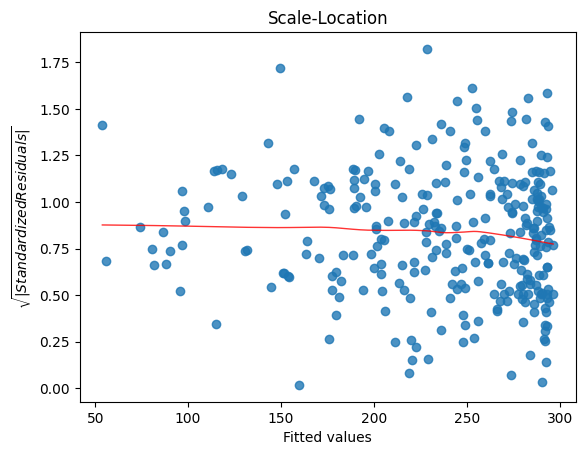

In [862]:
from statsmodels.graphics.gofplots import ProbPlot
import seaborn as sns
import matplotlib.pyplot as plt

model_fitted_y = results.fittedvalues
model_residuals = results.resid
model_norm_residuals = results.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

plot_lm_2 = plt.figure()
sns.regplot(x=model_fitted_y, y=model_norm_residuals_abs_sqrt,
            scatter=True,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_2.axes[0].set_title('Scale-Location')
plot_lm_2.axes[0].set_xlabel('Fitted values')
plot_lm_2.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

Jak widzimy, biorąc tranformację zmiennych dochod-oszczednosci, oraz stosując regresję liniową dla predyktorów: const, dochod-oszczednosci, (dochod-oszczednosci)^2 oraz jednoos_1, dzieci, dostajemy model regresji, w którym niemal cała wariancja tłumaczona jest przez regresję. Dodatkowo pozbyliśmy się nieliniowości formy funkcyjnej oraz heteroskadystyczności składnika losowego - na pierwszym wykresie mamy niemal poziomą linię na wysokości 0, a wokół niej równomierne porozrzucane wartości co świadczy o liniowości formy, a na drugim podobnie, tylko nie na wysokości zera, co świadczy o homoskadystyczności naszego składnika losowego. Sprawdzimy jeszcze autokorelację składnika losowego oraz jego rozkład.

In [863]:
px.scatter(results.resid)

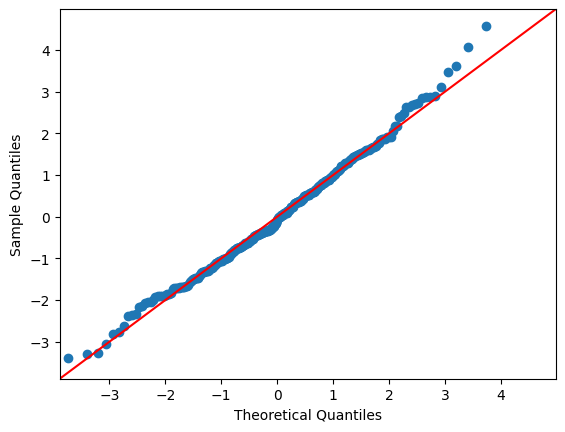

In [864]:
sm.qqplot(results.resid, line = '45', loc = np.mean(results.resid), scale = np.std(results.resid));

Widzimy, że zarówno rozkład składnika losowego wygląda teraz na normalny, jak i wartości wokół zera są teraz rozrzucone dużo bardziej równomiernie przy wykresie wskazującym autokorelację. Jedyne co, to zmienna jednoos_1 wygląda na nieprzydatną, ale bez niej dwa ostatnie warunki KMRL nie będą spełnione. Przyjmę zatem, że skoro uzyskałem model spełniający KMRL oraz przyjmujący wysoki współczynnik R^2, jest to mój najlepszy model.

Poniższe szacunki są na poziomie istotności 0.05.

Współczynnik płeć_2 jest dodatni i wynosi ok. 1.26, co oznacza, że będąc mężczyzną, wydaje się o 0.931-1.581 bajtalara więcej na jedzenie, przy założeniu, że pozostałe zmienne są takie same.

spółczynnik dzieci jest dodatni i wynosi ok. 1.46, co oznacza, że dodatkowe dziecko zwiększa miesięczne wydatki na jedzenie o ok. 1.365 - 1.608 bajtalara, przy założeniu, że pozostałe współczynniki się nie zmieniają.

In [893]:
s = pd.DataFrame(results.fittedvalues, columns = ['val'])
s = s.sort_values( by = 'val', ascending = False)
best10 = s[0:int(len(s)/100 * 10)]

In [894]:
best10

,val
id,
73,296.562398
151,296.461396
290,295.836760
93,294.943533
184,294.723772
277,294.249589
113,294.135148
46,293.998425
297,293.577501


In [909]:
best = cleaned_df[cleaned_df.index.isin(best10.index)]
worst = cleaned_df[~cleaned_df.index.isin(best10.index)]
best

,waga,wzrost,plec,dzieci,wiek,dochod,oszczednosci,jednoos,miejsce,wydatki_zyw
id,,,,,,,,,,
4,80.84,179.87,2,2,56,793.26,17.62,0,3,293.88
7,82.98,180.11,2,2,53,851.37,124.69,0,2,293.29
27,77.56,174.66,1,3,59,771.06,-30.43,0,1,293.62
29,81.71,172.90,1,3,58,870.96,104.67,0,2,296.54
38,78.19,166.01,1,0,42,895.58,121.05,0,1,293.64
40,85.36,173.44,2,1,46,860.05,10.34,0,3,291.85
41,78.92,171.62,2,3,49,972.79,296.96,0,2,289.42
43,80.85,181.16,2,4,56,854.03,-10.40,0,2,292.60
46,80.17,166.13,1,5,58,836.55,126.50,0,2,296.73


In [912]:
worst.describe()

,waga,wzrost,plec,dzieci,wiek,dochod,oszczednosci,jednoos,miejsce,wydatki_zyw
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000
mean,79.704345,172.743858,1.445693,1.928839,56.659176,1330.133109,868.210112,0.419476,1.988764,229.877640
std,3.315402,7.008358,0.497975,1.308802,6.623036,521.194622,580.061635,0.494400,0.738232,56.009818
min,71.380000,155.670000,1.000000,0.000000,37.000000,645.270000,-204.240000,0.000000,1.000000,56.270000
25%,77.240000,167.035000,1.000000,1.000000,52.000000,965.305000,445.540000,0.000000,1.000000,199.030000
50%,79.780000,172.570000,1.000000,2.000000,57.000000,1182.430000,749.390000,0.000000,2.000000,243.270000
75%,82.085000,178.365000,2.000000,3.000000,61.000000,1588.235000,1215.185000,1.000000,3.000000,277.515000
max,86.730000,190.790000,2.000000,5.000000,75.000000,3467.620000,2729.540000,1.000000,3.000000,293.300000


In [911]:
best.describe()

,waga,wzrost,plec,dzieci,wiek,dochod,oszczednosci,jednoos,miejsce,wydatki_zyw
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,81.068621,174.019655,1.655172,2.689655,52.931034,1381.227586,619.442759,0.275862,2.137931,293.428276
std,2.205120,5.848678,0.483725,1.365479,5.580137,757.957516,768.829989,0.454859,0.742781,1.794922
min,77.560000,159.970000,1.000000,0.000000,42.000000,771.060000,-30.430000,0.000000,1.000000,289.420000
25%,79.300000,171.620000,1.000000,2.000000,49.000000,895.580000,124.690000,0.000000,2.000000,292.150000
50%,80.570000,174.570000,2.000000,3.000000,54.000000,1064.460000,324.720000,0.000000,2.000000,293.290000
75%,81.850000,177.780000,2.000000,4.000000,56.000000,1264.950000,531.280000,1.000000,3.000000,294.270000
max,86.060000,182.830000,2.000000,5.000000,65.000000,3243.210000,2482.300000,1.000000,3.000000,296.800000


Statystyczny Bajtocjak spośród 10% najwięcej wydających na jedzenie spośród modelu:
- waży ok. 1kg więcej od statystycznego z pozostałych 90%
- jest częściej mężczyzną
- ma średnio o prawie jedno dziecko więcej od statystycznego z pozostałych 90%
- jest średnio o ok. 3.5 lata młodszy od pozostałych 90%
- ma podobny dochód, natomiast oszczędza o ponad 200 bajtalarów mniej  niż statystyczny z pozostałych 90%
- rzadziej mieszka w mieszkaniu jednoosobowym.